토이 회귀 데이터셋 만들기

선형회귀 linear regression의 가장 단순한 형태는 1차원 선에 대한 매개변수를 학습하는 것임
데이터 포인트 x가 1차원이라고 가정, 그다음 실젯값 레이블 y는 선형 규칙에 의해 생성된다고 가정

y = wx + b

w, b는 경사 하강법에 따른 데이터에서 추정되어야 하는 학습 가능한 매개변수

소량의 가우스 잡음으로 인해 교란된 선에 대한 방정식

y = wx + b + N(0,e)

평균 mean과 표준편차 standard deviation을 가진 가우스는 N(mean, standard deviation)으로 표기함

In [1]:
import numpy as np

In [3]:
N = 100 
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N,1))
y_np = np.reshape(w_true * x_np + b_true + noise, (-1))

In [4]:
import seaborn as sns

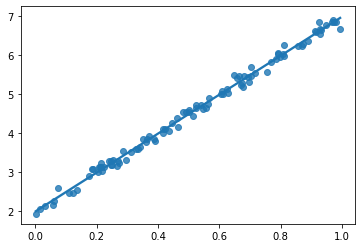

In [6]:
sns.regplot(x= x_np, y=y_np);

In [18]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #tensorflow version 1 호환 문제 해결 코드

In [19]:
# 플레이스홀더 placeholder는 텐서플로 계산 그래프에 정보를 입력하는 방법

tf.compat.v1.placeholder(tf.float32, shape=(2,2))

<tf.Tensor 'Placeholder:0' shape=(2, 2) dtype=float32>

In [22]:
# 피드 딕셔너리와 페치
# sess.run(var)를 사용하여 텐서플로에서 텐서를 평가할 수 있음
# 텐서플로 계산에서 플레이스홀더에 값은 피드 딕셔너리 feed dictionary를 만들어 넣음

a = tf.compat.v1.placeholder(tf.float32, shape=(1,))
b = tf.compat.v1.placeholder(tf.float32, shape=(1,))
c = a + b
with tf.compat.v1.Session() as sess:
    c_eval = sess.run(c, {a: [1.], b: [2.]})
    print(c_eval);

[3.]


In [26]:
# 네임 스코프
# 복잡한 텐서플로 프로그램에는 전체에 걸쳐 정의된 수많은 텐서, 변수, 플레이스홀더가 있음
# tf.name_scope(name)은 이러한 변수를 관리하기 위한 간단한 범위 지정 메커니즘을 제공

N = 5
with tf.name_scope('placeholder'):
    x = tf.compat.v1.placeholder(tf.float32, (N,1))
    y = tf.compat.v1.placeholder(tf.float32, (N,))
    
x

<tf.Tensor 'placeholder_10/Placeholder:0' shape=(5, 1) dtype=float32>

In [ ]:
# 옵티마이저
# tf.train 모듈에서 최적화 알고리즘 컬렉션을 제공
# tensorflow 연산 그래프에 Adam 옵티마이저 추가하기

learning_rate = .001
with tf.name_scope("optim"):
    train_op = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(l) # l은 손실

In [30]:
# tensorflow 기울기 구하기
# debugging과 같은 목적으로 기울기 값을 직접 확인할 때, tf.gradients를 사용함

W = tf.Variable((3,))
l = tf.reduce_sum(W)
gradW = tf.gradients(l, W)
gradW

# 위 코드는 학습 가능한 매개변수 tf.Variable W에 대한 손실 l의 기울기를 기호로 표시

[None]

In [ ]:
# 텐서보드를 위한 파일 쓰기와 요약
# 텐서 프로그램의 구조에 대한 시각적 이해를 얻는 것은 매우 유용, 텐서보드 패키지를 제공

# 손실을 위한 요약 합치기

with tf.name_scope('summaries'):
    tf.summary.scalar('loss', l)
    merged = tf.compat.v1.summary.merge_all()
    
train_writer = tf.compat.v1.summary.FileWriter('/tmt/lr-train', tf.compat.v1.get_default_graph())